# AM 205 - Assignment 5

## by Jonathan Guillotte-Blouin

In [176]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import line_search

### Question 1: Rosenbrock function

#### a) Minimize Rosenbrock's function using steepest descent.

$$ f(x,y) = 100 \left(y - x^2\right)^2 + (1 - x)^2 $$

$$ \frac{\partial f}{\partial x} = 200 \left(y - x^2\right) (-2x) + 2 (1-x) (-1) = 2 \left(200x^3 - 200xy + x - 1\right) $$

$$ \frac{\partial f}{\partial y} = 200 \left(y - x^2\right)$$

$$ \nabla f(x, y) = \left( \frac{\partial f}{\partial x} \; \; \frac{\partial f}{\partial y} \right) = \left( 2 \left(200x^3 - 200xy + x - 1\right) \, \, 200 \left(y - x^2\right) \right)$$

In [177]:
def f(point):
    x, y = point
    firstTerm = 100 * (y - x**2)**2
    secondTerm = (1-x)**2
    
    return firstTerm + secondTerm

def grad_f(point):
    x, y = point
    grad_x = 2 * (200 * x**3 - 200*x*y + x - 1)
    grad_y = 200 * (y - x**2)
    
    return np.array([grad_x, grad_y])

In [178]:
def steepest_gradient(starting_point):
    max_iterations = 2000
    stop_step_size = 1e-8
    xk = starting_point
    trajectory = [[xk[0], xk[1]]]

    for _ in range(max_iterations):
        sk = -grad_f(xk)
        nk = line_search(f, grad_f, xk, sk)[0]
        step = nk * sk
        xk += step
        trajectory.append([xk[0], xk[1]])
        
        if np.linalg.norm(step, 2) <= stop_step_size:
            break
            
    return xk, len(trajectory)-1, np.array(trajectory)

In [179]:
steepest_result_min1_1 = steepest_gradient([-1, 1])
print("Starting at (-1, 1), it took {} iterations to reach {}".format(steepest_result_min1_1[1], steepest_result_min1_1[0]))
steepest_result_0_1 = steepest_gradient([0, 1])
print("Starting at (0, 1), it took {} iterations to reach {}".format(steepest_result_0_1[1], steepest_result_0_1[0]))
steepest_result_2_1 = steepest_gradient([2, 1])
print("Starting at (2, 1), it stopped after {} iterations (maximum) to reach {}".format(steepest_result_2_1[1], steepest_result_2_1[0]))

Starting at (-1, 1), it took 2 iterations to reach [1. 1.]
Starting at (0, 1), it took 1571 iterations to reach [0.99999957 0.99999913]
Starting at (2, 1), it stopped after 2000 iterations (maximum) to reach [1.1657344  1.35997963]


In [180]:
numGridPoints = 1000
x = np.linspace(-2, 2.1, numGridPoints)
y = np.linspace(-3.5, 4, numGridPoints)
xx, yy = np.meshgrid(x, y)
zz = np.zeros((numGridPoints, numGridPoints))

for i in range(numGridPoints):
    for j in range(numGridPoints):
        zz[i][j] = f([xx[i,j], yy[i,j]])

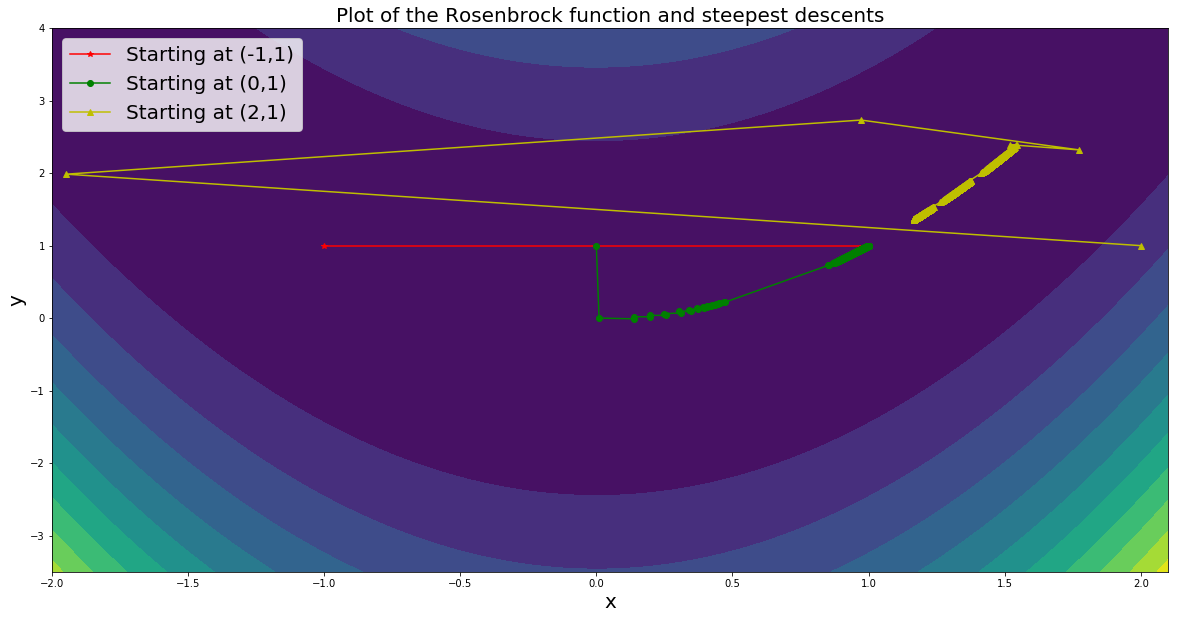

In [181]:
plt.figure(figsize=(20,10))
plt.contourf(xx,yy,zz, 10)
plt.plot(steepest_result_min1_1[2][:,0], steepest_result_min1_1[2][:,1], color="r", marker='*', label="Starting at (-1,1)")
plt.plot(steepest_result_0_1[2][:,0], steepest_result_0_1[2][:,1], color="g", marker='o', label="Starting at (0,1)")
plt.plot(steepest_result_2_1[2][:,0], steepest_result_2_1[2][:,1], color="y", marker='^', label="Starting at (2,1)")
plt.legend(fontsize=20)
plt.title("Plot of the Rosenbrock function and steepest descents", fontsize=20)
plt.ylabel("y", fontsize=20)
_ = plt.xlabel("x", fontsize=20)

#### b) Repeat a), but with Newton's method.

We need to define the Hessian matrix.

$$ H_f(x,y) = \begin{bmatrix}
\frac{\partial^2 f}{\partial x^2} & \frac{\partial^2 f}{\partial xy} \\
\frac{\partial^2 f}{\partial yx} & \frac{\partial^2 f}{\partial y^2} \\
\end{bmatrix}
$$

$$ \frac{\partial^2 f}{\partial x^2} = 2 \left(600x^2 - 200y + 1\right) $$

$$ \frac{\partial^2 f}{\partial xy} = \frac{\partial^2 f}{\partial yx} = -400x $$

$$ \frac{\partial^2 f}{\partial y^2} = 200 $$

So,

$$ H_f(x,y) = \begin{bmatrix}
2 \left(600x^2 - 200y + 1\right) & -400x \\
-400x & 200 \\
\end{bmatrix}
$$

In [182]:
def hessian_rosenbrock(point):
    x, y = point
    cell_11 = 2 * (600 * x**2 - 200*y + 1)
    cell_21 = -400 * x
    cell_22 = 200
    
    return np.matrix([[cell_11, cell_21], [cell_21, cell_22]])

def newton_method(starting_point):
    max_iterations = 2000
    stop_step_size = 1e-8
    xk = starting_point
    trajectory = [[xk[0], xk[1]]]

    for _ in range(max_iterations):
        sk = np.linalg.solve(hessian_rosenbrock(xk), -grad_f(xk))
        xk += sk
        trajectory.append([xk[0], xk[1]])
        
        if np.linalg.norm(sk, 2) <= stop_step_size:
            break
            
    return xk, len(trajectory), np.array(trajectory)

In [183]:
newton_result_min1_1 = newton_method([-1, 1])
print("Starting at (-1, 1), it took {} iterations to reach {}".format(newton_result_min1_1[1], newton_result_min1_1[0]))
newton_result_0_1 = newton_method([0, 1])
print("Starting at (0, 1), it took {} iterations to reach {}".format(newton_result_0_1[1], newton_result_0_1[0]))
newton_result_2_1 = newton_method([2, 1])
print("Starting at (2, 1), it took {} iterations to reach {}".format(newton_result_2_1[1], newton_result_2_1[0]))

Starting at (-1, 1), it took 4 iterations to reach [1. 1.]
Starting at (0, 1), it took 7 iterations to reach [1. 1.]
Starting at (2, 1), it took 7 iterations to reach [1. 1.]


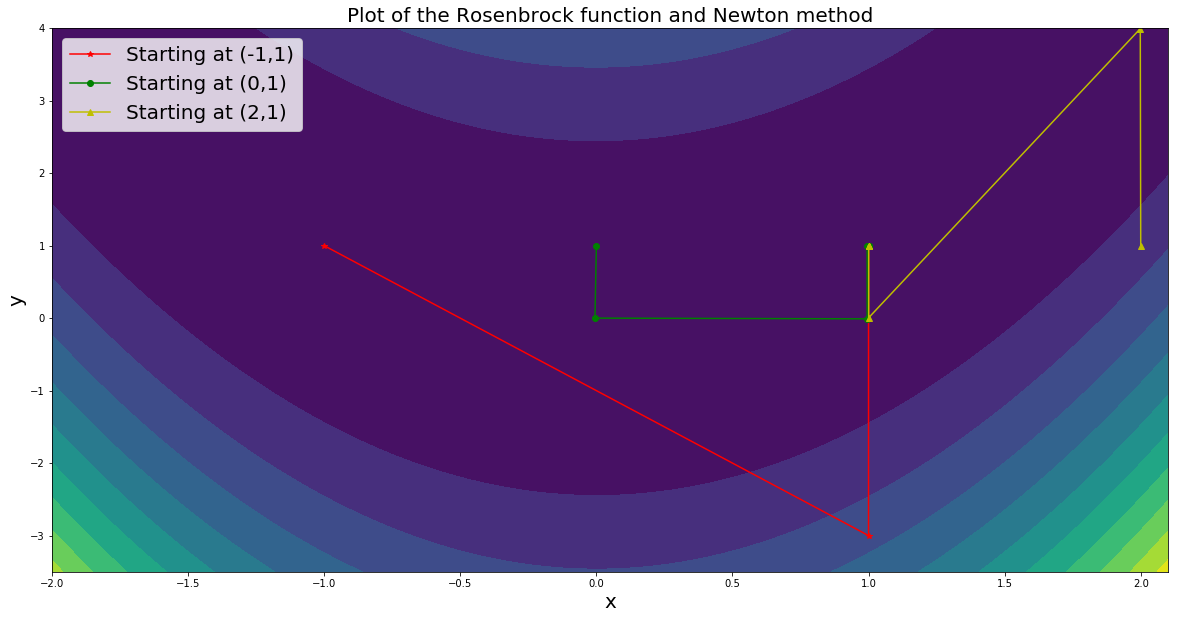

In [222]:
plt.figure(figsize=(20,10))
plt.contourf(xx,yy,zz, 10)
plt.plot(newton_result_min1_1[2][:,0], newton_result_min1_1[2][:,1], color="r", marker='*', label="Starting at (-1,1)")
plt.plot(newton_result_0_1[2][:,0], newton_result_0_1[2][:,1], color="g", marker='o', label="Starting at (0,1)")
plt.plot(newton_result_2_1[2][:,0], newton_result_2_1[2][:,1], color="y", marker='^', label="Starting at (2,1)")
plt.legend(fontsize=20)
plt.title("Plot of the Rosenbrock function and Newton method", fontsize=20)
plt.xlabel("x", fontsize=20)
_ = plt.ylabel("y", fontsize=20)

#### c) Repeat a), but with BFGS. Set $B_0$ to the identity matrix.

In [223]:
def BFGS(starting_point, B0=np.identity(2)):
    max_iterations = 2000
    stop_step_size = 1e-8
    xk = starting_point.copy()
    Bk = B0.copy()
    trajectory = [[xk[0], xk[1]]]

    for _ in range(max_iterations):
        grad_xk = grad_f(xk)
        sk = np.linalg.solve(Bk, -grad_xk)
        xk += sk
        trajectory.append([xk[0], xk[1]])
        
        if np.linalg.norm(sk, 2) <= stop_step_size:
            break
            
        # Calculating Bk with np.array will behave badly. The formula assumes we are working with
        # column-vectors, while np.arrays are row-vectors that can't be transposed.
        # To fix this, I transform them into matrices and transpose them (so that they are columns).
        yk = np.matrix(grad_f(xk) - grad_xk).T
        sk = np.matrix(sk).T

        Bk += (np.matmul(yk, yk.T) / np.dot(yk.T, sk)) - (np.matmul(np.matmul(np.matmul(Bk, sk), sk.T), Bk) / np.dot(np.matmul(sk.T, Bk), sk))
            
    return xk, len(trajectory), np.array(trajectory)

In [224]:
bfgs_result_min1_1 = BFGS([-1, 1])
print("Starting at (-1, 1), it took {} iterations to reach {}".format(bfgs_result_min1_1[1], bfgs_result_min1_1[0]))
bfgs_result_0_1 = BFGS([0, 1])
print("Starting at (0, 1), it took {} iterations to reach {}".format(bfgs_result_0_1[1], bfgs_result_0_1[0]))
bfgs_result_2_1 = BFGS([2, 1])
print("Starting at (2, 1), it stopped after {} iterations (maximum) to reach {}".format(bfgs_result_2_1[1], bfgs_result_2_1[0]))

Starting at (-1, 1), it took 125 iterations to reach [1. 1.]
Starting at (0, 1), it took 39 iterations to reach [1. 1.]
Starting at (2, 1), it stopped after 46 iterations (maximum) to reach [1. 1.]


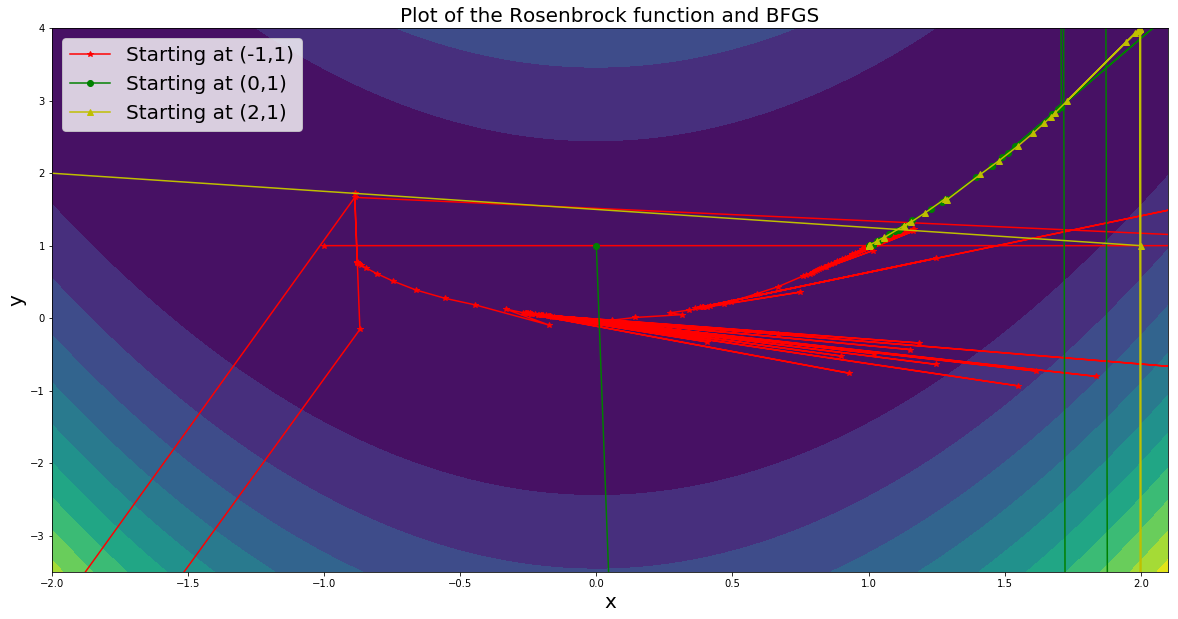

In [227]:
plt.figure(figsize=(20,10))
plt.contourf(xx,yy,zz, 10)
plt.plot(bfgs_result_min1_1[2][:,0], bfgs_result_min1_1[2][:,1], color="r", marker='*', label="Starting at (-1,1)")
plt.plot(bfgs_result_0_1[2][:,0], bfgs_result_0_1[2][:,1], color="g", marker='o', label="Starting at (0,1)")
plt.plot(bfgs_result_2_1[2][:,0], bfgs_result_2_1[2][:,1], color="y", marker='^', label="Starting at (2,1)")
plt.legend(fontsize=20)
plt.title("Plot of the Rosenbrock function and BFGS", fontsize=20)
plt.axis([-2, 2.1, -3.5, 4])
plt.xlabel("x", fontsize=20)
_ = plt.ylabel("y", fontsize=20)